# Analisis de encuestas Dlivery.
### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

%matplotlib inline


In [2]:
dlivery_df = pd.read_csv("dlivery.csv")

In [3]:
dlivery_df.head()

,Marca temporal,¿Actualmente estás cursando TSU o Ingeniería-Licenciatura?,¿A cuál carrera perteneces?,"¿En cuanto a productos y alimentos, eres vendedor o consumidor?",¿Qué tipo de productos vendes dentro de la universidad?,¿Cuántas ventas realizas al día dentro de la universidad (sólo números)?,¿Qué tan satisfecho estas con el volumen de ventas que generas dentro de campus?,¿Consideras que una aplicación impulsaría las ventas de tus productos dentro de la universidad?,¿Estarías dispuesto a pagar por una aplicación que organice y te de contacto directo con tus clientes en la universidad?,¿Cuánto estarías dispuesto a pagar por el uso de una app para realizar tus ventas (sólo números)?,...,¿Qué medio utilizas para enterarte de los productos (regalos o accesorios personales) en la universidad?,¿Cuánto estarías dispuesto a pagar por envíos de tus productos (sólo números)?,¿Estás dispuesto a utilizar una aplicación que te organice todos los vendedores de regalos y accesorios personales dentro de la universidad?,¿Consumes alimentos dentro de la universidad?,¿Consumes productos de papelería dentro de la universidad?,¿Consumes productos de tecnología dentro de la universidad?,¿Consumes productos como regalos o accesorios personales dentro de la universidad?,¿Consumes productos de papelería dentro de la universidad? .1,¿Consumes productos de regalos o accesorios personales dentro de la universidad?,¿Consumes productos de tecnología dentro de la universidad? .1
0,1/10/2024 9:28:46,TSU,Licenciatura en Gestión y Desarrollo Turístico,Consumidor,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/10/2024 9:36:23,TSU,Ingeniería en Tecnologías de la Información e ...,Consumidor,NaN,NaN,NaN,NaN,NaN,NaN,...,Amigos y compañeros,100.0,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/10/2024 9:37:29,TSU,Ingeniería en Tecnologías de la Información e ...,Consumidor,NaN,NaN,NaN,NaN,NaN,NaN,...,Amigos y compañeros,0.0,Tal vez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/10/2024 10:07:24,TSU,Ingeniería en Tecnologías de la Información e ...,Consumidor,NaN,NaN,NaN,NaN,NaN,NaN,...,Amigos y compañeros,5.0,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2024 11:40:09,TSU,Ingeniería en Tecnologías de la Información e ...,Consumidor,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Renombrar columnas
dlivery_df.columns = [col.lower().replace(' ', '_') for col in dlivery_df.columns]
dlivery_df.columns

Index(['marca_temporal',
       '¿actualmente_estás_cursando_tsu_o_ingeniería-licenciatura?',
       '¿a_cuál_carrera_perteneces?',
       '¿en_cuanto_a_productos_y_alimentos,_eres_vendedor_o_consumidor?',
       '¿qué_tipo_de_productos_vendes_dentro_de_la_universidad?',
       '¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?',
       '¿qué_tan_satisfecho_estas_con_el_volumen_de_ventas_que_generas_dentro_de_campus?',
       '¿consideras_que_una_aplicación_impulsaría_las_ventas_de_tus_productos_dentro_de_la_universidad?',
       '¿estarías_dispuesto_a_pagar_por_una_aplicación_que_organice_y_te_de_contacto_directo_con_tus_clientes_en_la_universidad?',
       '¿cuánto_estarías_dispuesto_a_pagar_por_el_uso_de_una_app_para_realizar_tus_ventas_(sólo_números)?',
       '¿cuántos_productos_agregarías_a_tu_oferta_si_vendieras_a_través_de_una_app_(sólo_números)?',
       '¿cómo_promocionas_habitualmente_tus_productos_dentro_de_la_universidad?',
       '¿cuántas_promocion

In [5]:
#Dataframe para consumidores
# Filtrar el DataFrame para obtener solo las filas que cumplen con las condiciones

dliveryAlimentos = dlivery_df[
    dlivery_df['¿qué_categorías_consumes_dentro_de_la_universidad?'].isin(['Alimentos', 'Ninguno']) |
    (dlivery_df['¿en_cuanto_a_productos_y_alimentos,_eres_vendedor_o_consumidor?'] == 'Vendedor')
]

### 1. Descripcion Basica de encuestados

In [6]:
tsu_ing = dliveryAlimentos['¿actualmente_estás_cursando_tsu_o_ingeniería-licenciatura?'].value_counts()

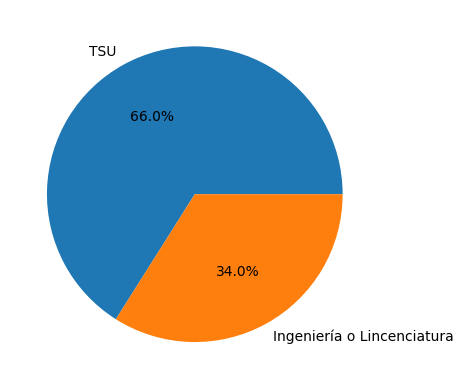

In [7]:
#Grafica de pastel por tsu y ingenieria
plt.pie(tsu_ing, labels=tsu_ing.index, autopct='%1.1f%%');
plt.show()

In [8]:
#TABLA DE FRECUENCIA PARA TSU O ING
# Calculate relative frequency
tsu_ingRF = tsu_ing / len(dliveryAlimentos)

# Create a complete frequency table
tsu_ingFT = pd.DataFrame({

    'TSU O ING': tsu_ing.index,

    'Frecuencia': tsu_ing.values,

    'Frecuencia Relativa': tsu_ingRF.values,

    'Porcentaje': (tsu_ingRF * 100).values

})

tsu_ingFT

,TSU O ING,Frecuencia,Frecuencia Relativa,Porcentaje
0,TSU,35,0.660377,66.037736
1,Ingeniería o Lincenciatura,18,0.339623,33.962264


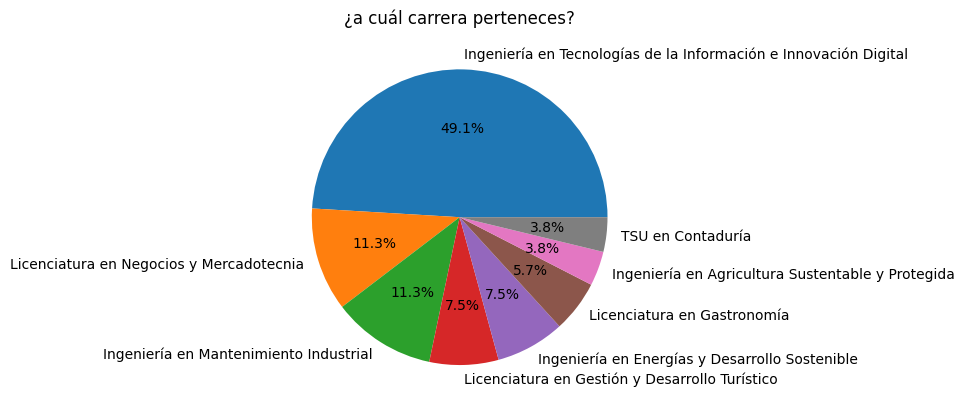

In [9]:
#A que carreras pertenecen los ecnuestados?
carreras = dliveryAlimentos['¿a_cuál_carrera_perteneces?'].value_counts() #conteo de las respuestas

#grafico de pastel
plt.pie(carreras, labels=carreras.index, autopct='%1.1f%%')
plt.title('¿a cuál carrera perteneces?')
plt.show()

In [10]:
#TABLA DE FRECUENCIA PARA CARRERAS
# Calculate relative frequency
carrerasRF = carreras / len(dliveryAlimentos)

# Create a complete frequency table
carrerasFT = pd.DataFrame({

    'Carreras': carreras.index,

    'Frecuencia': carreras.values,

    'Frecuencia Relativa': carrerasRF.values,

    'Porcentaje': (carrerasRF * 100).values

})

carrerasFT

,Carreras,Frecuencia,Frecuencia Relativa,Porcentaje
0,Ingeniería en Tecnologías de la Información e ...,26,0.490566,49.056604
1,Licenciatura en Negocios y Mercadotecnia,6,0.113208,11.320755
2,Ingeniería en Mantenimiento Industrial,6,0.113208,11.320755
3,Licenciatura en Gestión y Desarrollo Turístico,4,0.075472,7.547170
4,Ingeniería en Energías y Desarrollo Sostenible,4,0.075472,7.547170
5,Licenciatura en Gastronomía,3,0.056604,5.660377
6,Ingeniería en Agricultura Sustentable y Protegida,2,0.037736,3.773585
7,TSU en Contaduría,2,0.037736,3.773585


([<matplotlib.patches.Wedge at 0x1b41e75dc50>,
 [Text(-0.5022921680482001, -0.9786227965449399, 'Consumidor'),
  Text(0.5022921680482001, 0.9786227965449399, 'Vendedor')],
 [Text(-0.2739775462081091, -0.5337942526608762, '84.9%'),
  Text(0.2739775462081091, 0.5337942526608762, '15.1%')])

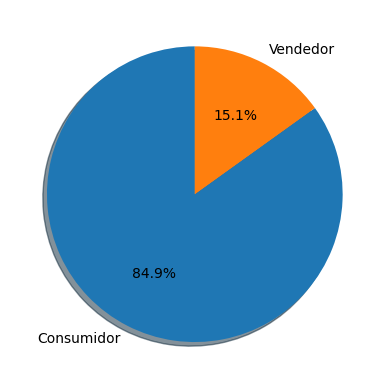

In [11]:
#Consumidor o vendedor
cons_vend = dliveryAlimentos['¿en_cuanto_a_productos_y_alimentos,_eres_vendedor_o_consumidor?'].value_counts() #Contar cantidad de veces que aparece cada respuesta

#Grafico de pastel
plt.pie(cons_vend, labels=cons_vend.index, autopct='%1.1f%%', shadow=True, startangle=90)

In [12]:
#TABLA DE FRECUENCIA PARA CARRERAS
# Calculate relative frequency
cons_vendRF = cons_vend / len(dliveryAlimentos)

# Create a complete frequency table
cons_vendFT = pd.DataFrame({

    'Consumidor / Vendedor': cons_vend.index,

    'Frecuencia': cons_vend.values,

    'Frecuencia Relativa': cons_vendRF.values,

    'Porcentaje': (cons_vendRF * 100).values

})

cons_vendFT

,Consumidor / Vendedor,Frecuencia,Frecuencia Relativa,Porcentaje
0,Consumidor,45,0.849057,84.90566
1,Vendedor,8,0.150943,15.09434


### Analisis de seccion **VENDEDORES**

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Tipo de productos que ofrecen los vendedores')

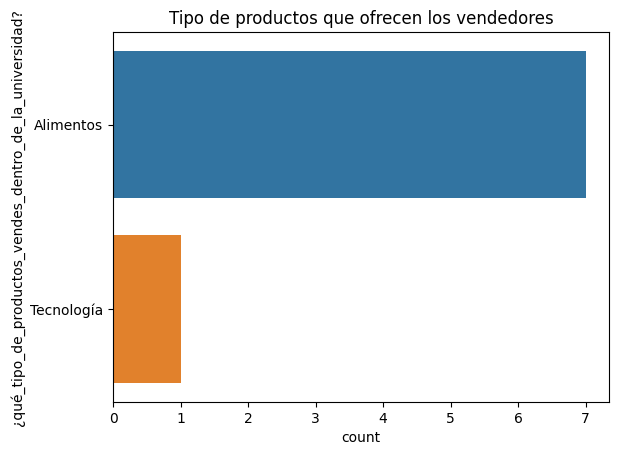

In [13]:
tipoProductos = dliveryAlimentos['¿qué_tipo_de_productos_vendes_dentro_de_la_universidad?'].value_counts()
#Countplot de tipo de productos que ofrecen los vendedores
sns.barplot(x=tipoProductos , y=tipoProductos.index, )
plt.title('Tipo de productos que ofrecen los vendedores')


In [14]:
#TABLA DE FRECUENCIA PARA TIPOS DE PRODUCTOS QUE SE OFRECEN EN LA UNIVERSIDAD
# Calculate relative frequency
tipoProductosRF = tipoProductos / 8

# Create a complete frequency table
tipoProductosFT = pd.DataFrame({

    'Tipo de productos': tipoProductos.index,

    'Frecuencia': tipoProductos.values,

    'Frecuencia Relativa': tipoProductosRF.values,

    'Porcentaje': (tipoProductosRF * 100).values

})

tipoProductosFT

,Tipo de productos,Frecuencia,Frecuencia Relativa,Porcentaje
0,Alimentos,7,0.875,87.5
1,Tecnología,1,0.125,12.5


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Ventas realizadas por vendedor')

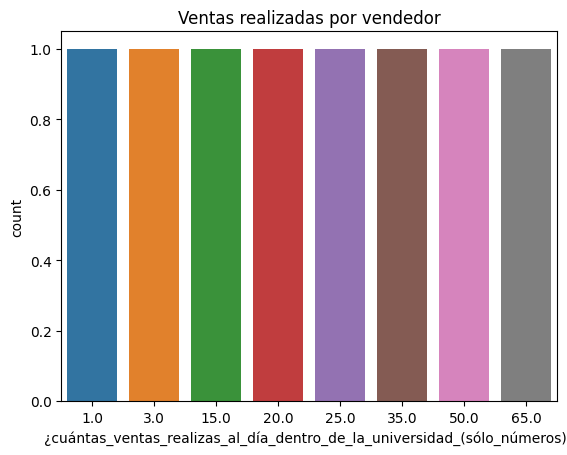

In [15]:
#CUANTAS VENTAS REALIZADAS POR VENDEDOR
vVentas = dliveryAlimentos['¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?'].value_counts()
#Grafica de cajas con medias y desviaciones estandar
sns.barplot(x=vVentas.index, y=vVentas)
plt.title('Ventas realizadas por vendedor')

In [16]:
#PASAR A INTERVALOS POR QUE LOS DATOS SON BASTANTE DISPERSOS
vVentas = {'1-17': 3,
           '17-33': 2,
           '33-49': 1,
           '49-65': 2,}

x = [((1+17)/2), ((33+49))/2, ((49+65)/2), ((65+81))/2]

In [17]:
# Calcular la frecuencia total
frecuencia_total = sum(vVentas.values())

# Crear un DataFrame a partir del diccionario
x_values = [(1+17)/2, (17+33)/2, (33+49)/2, (49+65)/2]
df_frecuencia = pd.DataFrame({
    'Intervalo': list(vVentas.keys()),
    'Frecuencia': list(vVentas.values()),
    'x': x_values
})

# Calcular la frecuencia relativa y el porcentaje
df_frecuencia['Frecuencia Relativa'] = df_frecuencia['Frecuencia'] / frecuencia_total
df_frecuencia['Porcentaje'] = df_frecuencia['Frecuencia Relativa'] * 100

# Mostrar la tabla de frecuencia
print(df_frecuencia)

  Intervalo  Frecuencia     x  Frecuencia Relativa  Porcentaje
0      1-17           3   9.0                0.375        37.5
1     17-33           2  25.0                0.250        25.0
2     33-49           1  41.0                0.125        12.5
3     49-65           2  57.0                0.250        25.0


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Ventas por intervalo')

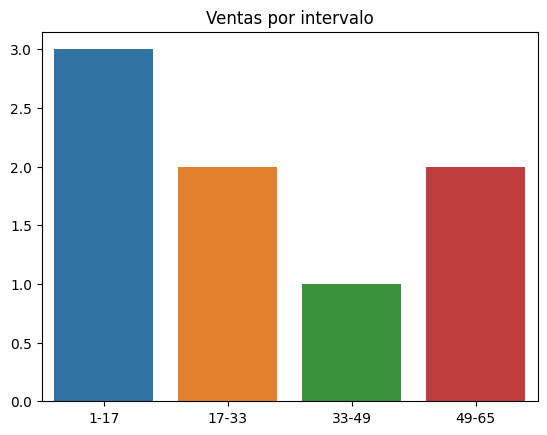

In [18]:
sns.barplot(x=pd.Series(vVentas).index, y=pd.Series(vVentas).values)
plt.title('Ventas por intervalo')

In [19]:
rango = 64
intervalo = 4
amplitud = rango / intervalo

print(amplitud)

16.0


In [20]:
#Mediana de las ventas por dia
ventas = dliveryAlimentos['¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?'].value_counts()
medianaVentas = (20 + 25)/2

#Media de ventas por dia
meanVentas = np.mean(pd.Series(ventas).index)

#Rango de ventas por dia
rangoVentas = pd.Series(ventas).index.max() - pd.Series(ventas).index.min()

#Desviacion estandar de ventas por dia
desviacionEstandarVentas = np.std(pd.Series(ventas).index)

#varianza de ventas por dia
varianzaVentas = np.var(pd.Series(ventas).index)

print('Media de ventas por dia: ' + str(meanVentas))
print('Rango de ventas por dia: ' + str(rangoVentas))
print('Desviacion estandar de ventas por dia: ' + str(desviacionEstandarVentas))
print('Mediana de las ventas por dia: ' + str(medianaVentas))
print('Varianza de ventas por dia: ' + str(varianzaVentas))
print('Coeficiente de desviacion de las ventas por dia: ' + str((desviacionEstandarVentas/meanVentas)*100))

Media de ventas por dia: 26.75
Rango de ventas por dia: 64.0
Desviacion estandar de ventas por dia: 20.873128658636684
Mediana de las ventas por dia: 22.5
Varianza de ventas por dia: 435.6875
Coeficiente de desviacion de las ventas por dia: 78.03038750892219


+ Debido a que la media se encuentra cercana a la desviación estándar, la distribución de la media es aproximadamente normal. Esto quiere decir que la mayoria de vendedores tienen unas ventas que no se desvian mucho del promedio.
+ La varianza alta indica que la mayoria de vendedores tienen unas ventas que se desvian de la media.
+ Cabe recalcar que al hacer un analisis sobre aquellos vendedores con ventas bajas se encontro que los que ofrecen tecnología venden menos.

In [21]:
#TABLA DE FRECUENCIA PARA TIPOS DE PRODUCTOS QUE SE OFRECEN EN LA UNIVERSIDAD
# Calculate relative frequency
ventasRF = ventas / 8

# Create a complete frequency table
ventasFT = pd.DataFrame({

    'Ventas x dia': ventas.index,

    'Frecuencia': ventas.values,

    'Frecuencia Relativa': ventasRF.values,

    'Porcentaje': (ventasRF * 100).values

})

ventasFT

,Ventas x dia,Frecuencia,Frecuencia Relativa,Porcentaje
0,25.0,1,0.125,12.5
1,35.0,1,0.125,12.5
2,65.0,1,0.125,12.5
3,20.0,1,0.125,12.5
4,50.0,1,0.125,12.5
5,1.0,1,0.125,12.5
6,3.0,1,0.125,12.5
7,15.0,1,0.125,12.5


Text(0.5, 1.0, 'Satisfaccion por Ventas en la Universidad')

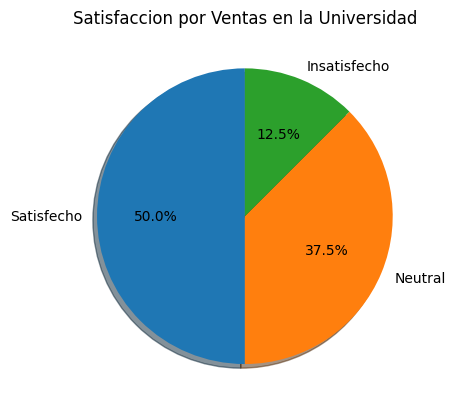

In [22]:
#GRAFICAA DE SATISFACCION POR VENTASN EN LA UNIVERSIDAD
satisfaccionV = dliveryAlimentos['¿qué_tan_satisfecho_estas_con_el_volumen_de_ventas_que_generas_dentro_de_campus?'].value_counts()
plt.pie(satisfaccionV, labels=satisfaccionV.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Satisfaccion por Ventas en la Universidad')

In [23]:
#TABLA DE FRECUENCIA PARA TIPOS DE PRODUCTOS QUE SE OFRECEN EN LA UNIVERSIDAD
# Calculate relative frequency
satisfaccionVRF = satisfaccionV / 8

# Create a complete frequency table
satisfaccionVFT = pd.DataFrame({

    'Nivel de satisfaccion': satisfaccionV.index,

    'Frecuencia': satisfaccionV.values,

    'Frecuencia Relativa': satisfaccionVRF.values,

    'Porcentaje': (satisfaccionVRF * 100).values

})

satisfaccionVFT

,Nivel de satisfaccion,Frecuencia,Frecuencia Relativa,Porcentaje
0,Satisfecho,4,0.500,50.0
1,Neutral,3,0.375,37.5
2,Insatisfecho,1,0.125,12.5


Text(0.5, 1.0, '¿consideras que una aplicación impulsaría las ventas de tus productos dentro de la universidad?')

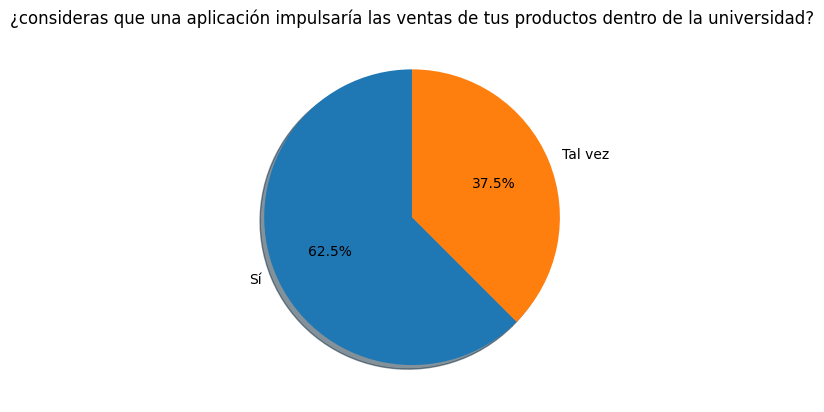

In [24]:
#GRAFICAA DE COISIDERAS QEU UNA APP IMPULSARIA TUS VENTAS
considerasIV = dliveryAlimentos['¿consideras_que_una_aplicación_impulsaría_las_ventas_de_tus_productos_dentro_de_la_universidad?'].value_counts()
plt.pie(considerasIV, labels=considerasIV.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('¿consideras que una aplicación impulsaría las ventas de tus productos dentro de la universidad?')

In [25]:
#TABLA DE FRECUENCIA PARA UNA APP IMPULSARIA TUS VENTAS
# Calculate relative frequency
considerasIVRF = considerasIV / 8

# Create a complete frequency table
considerasIVFT = pd.DataFrame({

    'App impulsaria tus ventas?': considerasIV.index,

    'Frecuencia': considerasIV.values,

    'Frecuencia Relativa': considerasIVRF.values,

    'Porcentaje': (considerasIVRF * 100).values

})

considerasIVFT

,App impulsaria tus ventas?,Frecuencia,Frecuencia Relativa,Porcentaje
0,Sí,5,0.625,62.5
1,Tal vez,3,0.375,37.5


Text(0.5, 1.0, 'Pagarias por una app que organice y te de contacto directo con tus clientes?')

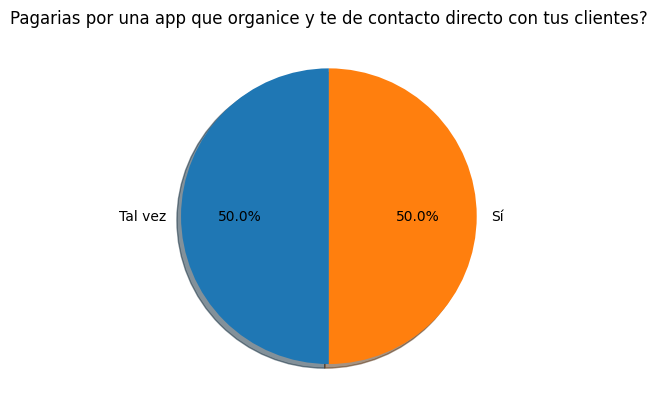

In [26]:
#GRAFICAA DE ESTARIAS DISPUESTO A PAGAR POR UNA APP QUE ORGANICE Y TE DE CONTACTO DIRECTO CONT US CLIENTES
estariasDP = dliveryAlimentos['¿estarías_dispuesto_a_pagar_por_una_aplicación_que_organice_y_te_de_contacto_directo_con_tus_clientes_en_la_universidad?'].value_counts()
plt.pie(estariasDP, labels=estariasDP.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pagarias por una app que organice y te de contacto directo con tus clientes?')

In [27]:
#TABLA DE FRECUENCIA PAGARIAS POR UNA APP
# Calculate relative frequency
estariasDPRF = estariasDP / 8

# Create a complete frequency table
estariasDPFT = pd.DataFrame({

    'App impulsaria tus ventas?': estariasDP.index,

    'Frecuencia': estariasDP.values,

    'Frecuencia Relativa': estariasDPRF.values,

    'Porcentaje': (estariasDPRF * 100).values

})

estariasDPFT

,App impulsaria tus ventas?,Frecuencia,Frecuencia Relativa,Porcentaje
0,Tal vez,4,0.5,50.0
1,Sí,4,0.5,50.0


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuanto pagarian por una app')

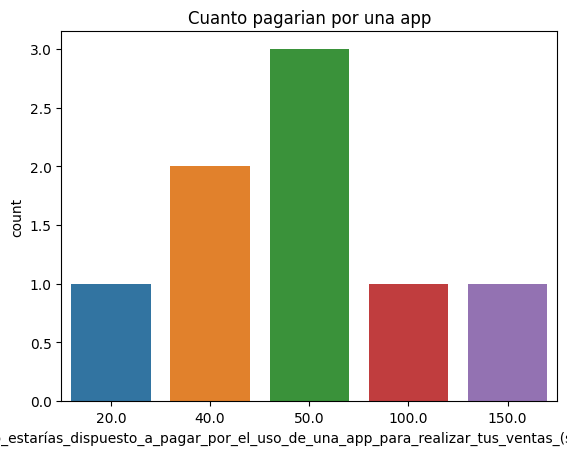

In [28]:
#GRAFICAA DE CUANTO ESTARIAS DISPUESTO A PAGAR POR UNA APP QUE ORGANICE Y TE DE CONTACTO DIRECTO CONT US CLIENTES
cuantoPag = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_el_uso_de_una_app_para_realizar_tus_ventas_(sólo_números)?'].value_counts()
#Grafica de cajas con medias y desviaciones estandar
sns.barplot(x=cuantoPag.index, y=cuantoPag)
plt.title('Cuanto pagarian por una app')

In [29]:
#TABLA DE FRECUENCIA DISPOSICION A PAGAR
# Calculate relative frequency
cuantoPagRF = cuantoPag / 8

# Create a complete frequency table
cuantoPagFT = pd.DataFrame({

    'Cuanto pagartias por una app?': cuantoPag.index,

    'Frecuencia': cuantoPag.values,

    'Frecuencia Relativa': cuantoPagRF.values,

    'Porcentaje': (cuantoPagRF * 100).values

})

cuantoPagFT

,Cuanto pagartias por una app?,Frecuencia,Frecuencia Relativa,Porcentaje
0,50.0,3,0.375,37.5
1,40.0,2,0.250,25.0
2,150.0,1,0.125,12.5
3,20.0,1,0.125,12.5
4,100.0,1,0.125,12.5


In [30]:
#Mediana
medianaCPagarian = 50

#Media
meanCpagarian = np.mean([20,40,40,50,50,50,100,150])

#Rango
rangoCPagarian = pd.Series(cuantoPag).index.max() - pd.Series(cuantoPag).index.min()

#Desviacion estandar
desviacionEstandarCPagarian = np.std([20,40,40,50,50,50,100,150])

#varianza
varianzaCPagarian = np.var([20,40,40,50,50,50,100,150])

print('Media cuanto pagarian: ' + str(meanCpagarian))
print('Rango de cuanto pagarian: ' + str(rangoCPagarian))
print('Desviacion estandar de cuanto pagarian: ' + str(desviacionEstandarCPagarian))
print('Mediana de cuanto pagarian: ' + str(medianaCPagarian))
print('Varianza de cuanto pagarian: ' + str(varianzaCPagarian))
print('Moda de cuanto pagarian: ' + str(50))
print('Coeficiente de variacion de cuanto pagarian: ' + str((desviacionEstandarCPagarian/meanCpagarian)*100))

Media cuanto pagarian: 62.5
Rango de cuanto pagarian: 130.0
Desviacion estandar de cuanto pagarian: 39.29058411375428
Mediana de cuanto pagarian: 50
Varianza de cuanto pagarian: 1543.75
Moda de cuanto pagarian: 50
Coeficiente de variacion de cuanto pagarian: 62.864934582006846


+ Los datos muestran que, aunque en promedio las personas pagarían 62.5, hay una variabilidad considerable (39.29 de desviación estándar), lo que significa que las respuestas son bastante diversas.
+ El rango alto (130) refuerza esta idea, y la mediana más baja que la media (50 frente a 62.5) sugiere que hay algunas respuestas más altas que están elevando el promedio.
+ Moda (50) es la que más se repite en las respuestas. Esto puede ser un punto de referencia clave pues refleja una tendencia clara en las preferencias de la mayoría de las personas.

C:\Users\kevin\AppData\Local\Temp\ipykernel_2920\2547464387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.Series(cuantoPag), x=pd.Series(cuantoPag).index, bins=10)
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.

<Axes: xlabel='count', ylabel='Density'>

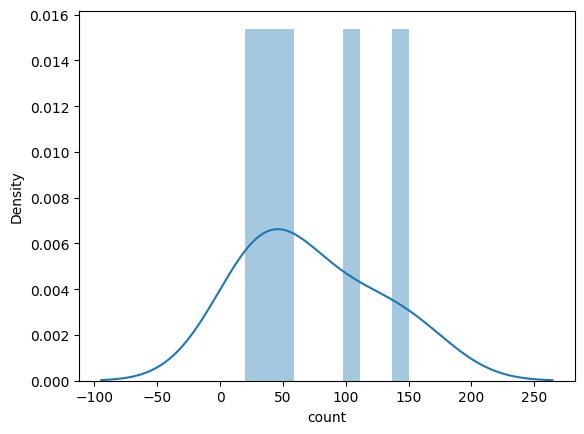

In [31]:
sns.distplot(pd.Series(cuantoPag), x=pd.Series(cuantoPag).index, bins=10)

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuantos productos agregarias a tu oferta si vendieras a traves de una app')

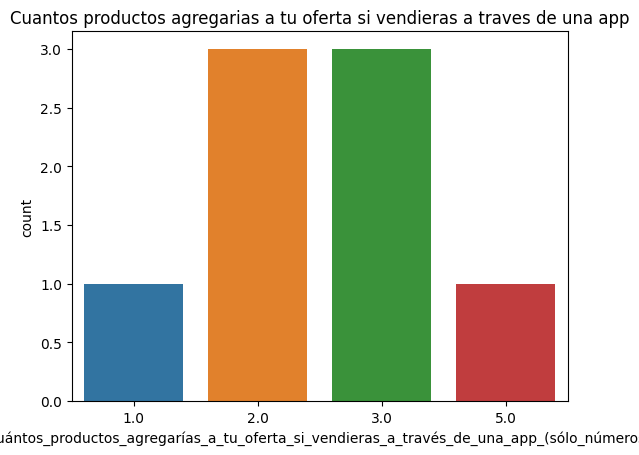

In [32]:
#GRAFICAA DE CUANTOS PRODUCTOS SE AGREGFARIAN A TU OFERTA SI VENDIERAS A TRAVES DE UNA APP
cuantosProd = dliveryAlimentos['¿cuántos_productos_agregarías_a_tu_oferta_si_vendieras_a_través_de_una_app_(sólo_números)?'].value_counts()
#Grafica de barras
sns.barplot(x=cuantosProd.index, y=cuantosProd)
plt.title('Cuantos productos agregarias a tu oferta si vendieras a traves de una app')

In [33]:
#TABLA DE FRECUENCIA PRODUCTOS A AGREGAR EN APLICACION
# Calculate relative frequency
cuantosProdRF = cuantosProd / 8

# Create a complete frequency table
cuantosProdFT = pd.DataFrame({

    'Cuantos productos agregarias?': cuantosProd.index,

    'Frecuencia': cuantosProd.values,

    'Frecuencia Relativa': cuantosProdRF.values,

    'Porcentaje': (cuantosProdRF * 100).values

})

cuantosProdFT

,Cuantos productos agregarias?,Frecuencia,Frecuencia Relativa,Porcentaje
0,3.0,3,0.375,37.5
1,2.0,3,0.375,37.5
2,5.0,1,0.125,12.5
3,1.0,1,0.125,12.5


In [34]:
#Mediana
medianaCProd = 2.5

#Media
meanCProd = np.mean([1,2,2,2,3,3,3,5]).round()

#Rango
rangoCProd = pd.Series(cuantosProd).index.max() - pd.Series(cuantosProd).index.min()

#Desviacion estandar
desviacionEstandarCProd = np.std([1,2,2,2,3,3,3,5])

#varianza
varianzaCProd = np.var([1,2,2,2,3,3,3,5])

print('Media cantidad productos que agregarian: ' + str(meanCProd))
print('Rango cantidad productos que agregarian: ' + str(rangoCProd))
print('Desviacion estandar cantidad productos que agregarian: ' + str(desviacionEstandarCProd))
print('Mediana cantidad productos que agregarian: ' + str(medianaCProd))
print('Varianza cantidad productos que agregarian: ' + str(varianzaCProd))
print('Moda cantidad productos que agregarian: ' + str('3,2'))
print('Coeficiente de variacion cantidad productos que agregarian: ' + str((desviacionEstandarCProd/meanCProd)*100))

Media cantidad productos que agregarian: 3.0
Rango cantidad productos que agregarian: 4.0
Desviacion estandar cantidad productos que agregarian: 1.1110243021644486
Mediana cantidad productos que agregarian: 2.5
Varianza cantidad productos que agregarian: 1.234375
Moda cantidad productos que agregarian: 3,2
Coeficiente de variacion cantidad productos que agregarian: 37.034143405481615


+ Las personas, en promedio, agregarían 3 productos, y las respuestas están bastante concentradas alrededor de esta cantidad, como lo indica la baja desviación estándar.
+ Aunque la media es 3, la mediana es un poco menor (2.5), lo que sugiere que algunos valores más altos podrían estar influyendo en el promedio.
+ La moda bimodal (3 y 2) muestra que hay dos preferencias principales entre las respuestas, con grupos que tienden a elegir estas cantidades específicas.

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Como promocionas tus productos dentro de la universidad')

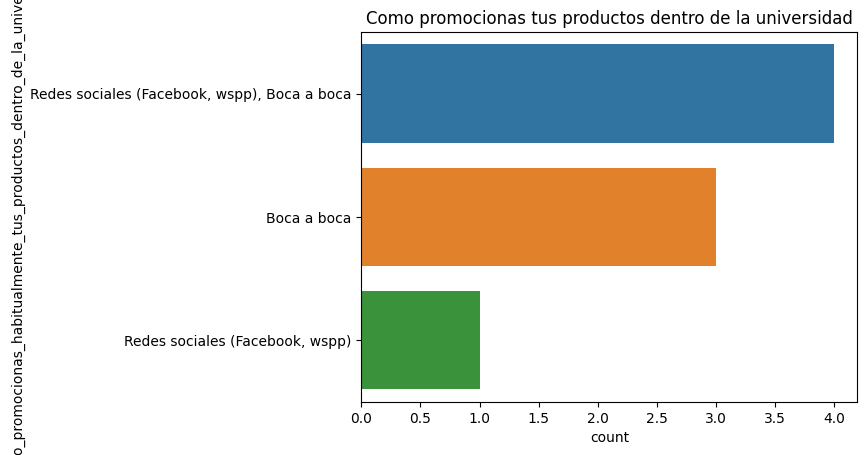

In [35]:
#GRAFICAA DE COMO PROMOCIONAS TUS PRODUCTOS
comoPromocionas = dliveryAlimentos['¿cómo_promocionas_habitualmente_tus_productos_dentro_de_la_universidad?'].value_counts()
#Grafica de barras
sns.barplot(x=comoPromocionas, y=comoPromocionas.index)
plt.title('Como promocionas tus productos dentro de la universidad')

In [36]:
#TABLA DE FRECUENCIA DE COMO PROMOCIONAS PRODUCTOS
# Calculate relative frequency
comoPromocionasRF = comoPromocionas / 8

# Create a complete frequency table
comoPromocionasFT = pd.DataFrame({

    'Como promocionas tus productos?': comoPromocionas.index,

    'Frecuencia': comoPromocionas.values,

    'Frecuencia Relativa': comoPromocionasRF.values,

    'Porcentaje': (comoPromocionasRF * 100).values

})

comoPromocionasFT

,Como promocionas tus productos?,Frecuencia,Frecuencia Relativa,Porcentaje
0,"Redes sociales (Facebook, wspp), Boca a boca",4,0.500,50.0
1,Boca a boca,3,0.375,37.5
2,"Redes sociales (Facebook, wspp)",1,0.125,12.5


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuantas promociones ofrecerías a los usuarios de la app')

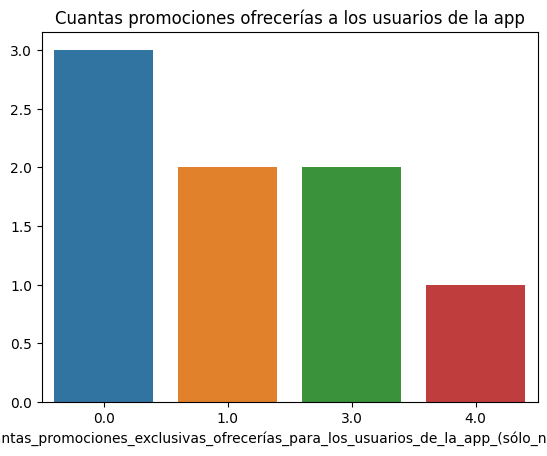

In [37]:
#GRAFICAA DE CUANTAS PROMOCIONES OFRECERIAS A LOS USUARIOS DE LA APP
cuantasPromo = dliveryAlimentos['¿cuántas_promociones_exclusivas_ofrecerías_para_los_usuarios_de_la_app_(sólo_números)?'].value_counts()
#Grafica de barras
sns.barplot(x=cuantasPromo.index, y=cuantasPromo.values)
plt.title('Cuantas promociones ofrecerías a los usuarios de la app')

In [38]:
#TABLA DE FRECUENCIA DE PROMOCIONAS PRODUCTOS EN LA APP
# Calculate relative frequency
cuantasPromoRF = cuantasPromo / 8

# Create a complete frequency table
cuantasPromoFT = pd.DataFrame({

    'Cuantas promociones afrecerias?': cuantasPromo.index,

    'Frecuencia': cuantasPromo.values,

    'Frecuencia Relativa': cuantasPromoRF.values,

    'Porcentaje': (cuantasPromoRF * 100).round(2).values

})

cuantasPromoFT

,Cuantas promociones afrecerias?,Frecuencia,Frecuencia Relativa,Porcentaje
0,0.0,3,0.375,37.5
1,3.0,2,0.250,25.0
2,1.0,2,0.250,25.0
3,4.0,1,0.125,12.5


In [39]:
#Mediana
medianaCPromo = 1

#Media
meanCPromo = np.mean([0,0,0,1,1,3,3,4]).round()

#Rango
rangoCPromo = pd.Series(cuantasPromo).index.max() - pd.Series(cuantasPromo).index.min()

#Desviacion estandar
desviacionEstandarCPromo = np.std([0,0,0,1,1,3,3,4])

#varianza
varianzaCPromo = np.var([0,0,0,1,1,3,3,4])

print('Media cantidad promociones que agregarian: ' + str(meanCPromo))
print('Rango cantidad promociones que agregarian: ' + str(rangoCPromo))
print('Desviacion estandar cantidad promociones que agregarian: ' + str(desviacionEstandarCPromo))
print('Mediana cantidad promociones que agregarian: ' + str(medianaCPromo))
print('Varianza cantidad promociones que agregarian: ' + str(varianzaCPromo))
print('Moda cantidad promociones que agregarian: ' + str(0))
print('Coeficiente de variacion cantidad promociones que agregarian: ' + str((desviacionEstandarCPromo/meanCPromo)*100))

Media cantidad promociones que agregarian: 2.0
Rango cantidad promociones que agregarian: 4.0
Desviacion estandar cantidad promociones que agregarian: 1.5
Mediana cantidad promociones que agregarian: 1
Varianza cantidad promociones que agregarian: 2.25
Moda cantidad promociones que agregarian: 0
Coeficiente de variacion cantidad promociones que agregarian: 75.0


+ En promedio, las personas agregarían 2 promociones, pero la mediana de 1 y la moda de 0 indican que la mayoría de las personas tienden a agregar menos promociones o incluso ninguna.
+ La desviación estándar de 1.5 sugiere que hay cierta variabilidad en las respuestas, con algunas personas que podrían estar dispuestas a agregar bastantes promociones, elevando el promedio.
+ El rango de 4 refuerza la idea de diversidad en las respuestas, pero el hecho de que 0 sea la moda muestra una preferencia común por no agregar promociones.

Text(0.5, 1.0, '¿Estarías dispuesto a dejar que personas realicen entregas de tus productos dentro de la universidad?')

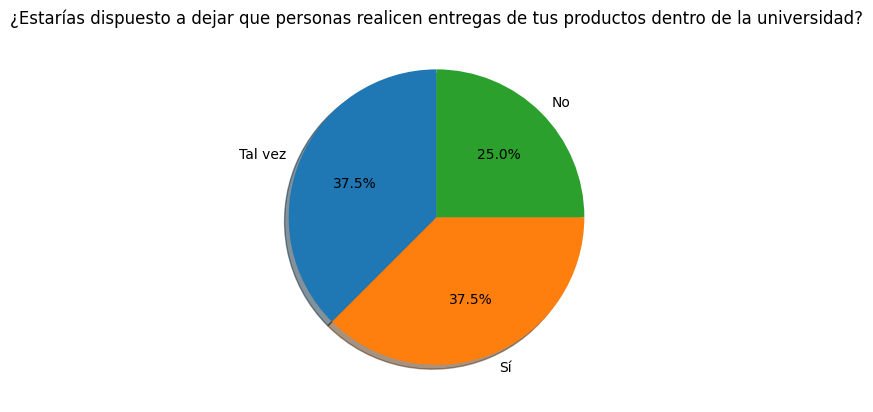

In [40]:
#GRAFICAA ESTARIAS DISPUESTO A TENER REPARTIDORES SOBRE TUS PRODUCTOS
dispRepartidores = dlivery_df['¿estarías_dispuesto_a_dejar_que_personas_realicen_entregas_de_tus_productos_dentro_de_la_universidad?'].value_counts()
#Grafica de barras
plt.pie(dispRepartidores, labels=dispRepartidores.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('¿Estarías dispuesto a dejar que personas realicen entregas de tus productos dentro de la universidad?')

In [41]:
#TABLA DE FRECUENCIA DISPUESTO A TENER REPARTIDORES
# Calculate relative frequency
dispRepartidoresRF = dispRepartidores / 8

# Create a complete frequency table
dispRepartidoresFT = pd.DataFrame({

    'Estarias dispuesto a tener repartidores?': dispRepartidores.index,

    'Frecuencia': dispRepartidores.values,

    'Frecuencia Relativa': dispRepartidoresRF.values,

    'Porcentaje': (dispRepartidoresRF * 100).values

})

dispRepartidoresFT

,Estarias dispuesto a tener repartidores?,Frecuencia,Frecuencia Relativa,Porcentaje
0,Tal vez,3,0.375,37.5
1,Sí,3,0.375,37.5
2,No,2,0.250,25.0


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'cuanto pagarías por que alguien realice entregas de tus pedidos')

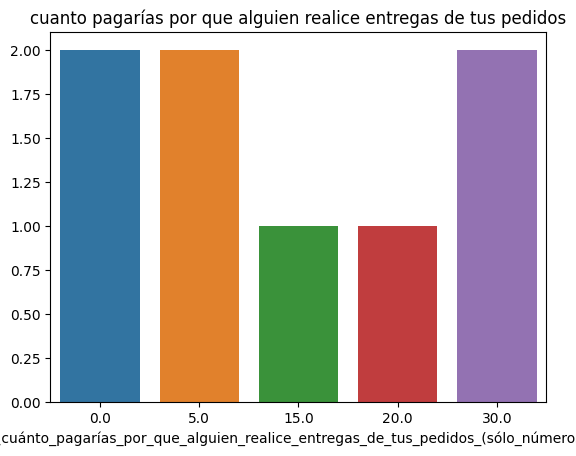

In [42]:
#GRAFICAA ESTARIAS CUANTO LE PAGARIAS A UN REPARTIDOR
cuantoRepartidores = dliveryAlimentos['¿cuánto_pagarías_por_que_alguien_realice_entregas_de_tus_pedidos_(sólo_números)?_'].value_counts()
#Grafica de barras
sns.barplot(x=cuantoRepartidores.index, y=cuantoRepartidores.values)
plt.title('cuanto pagarías por que alguien realice entregas de tus pedidos')

In [43]:
#TABLA DE FRECUENCIA CUANTO PAGARIAS A UN REPARTIDOR
cuantoRepartidoresRF = cuantoRepartidores / 8

# Create a complete frequency table
cuantoRepartidoresFT = pd.DataFrame({

    'Cuantas promociones afrecerias?': cuantoRepartidores.index,

    'Frecuencia': cuantoRepartidores.values,

    'Frecuencia Relativa': cuantoRepartidoresRF.values,

    'Porcentaje': (cuantoRepartidoresRF * 100).values

})

cuantoRepartidoresFT

,Cuantas promociones afrecerias?,Frecuencia,Frecuencia Relativa,Porcentaje
0,30.0,2,0.250,25.0
1,0.0,2,0.250,25.0
2,5.0,2,0.250,25.0
3,20.0,1,0.125,12.5
4,15.0,1,0.125,12.5


In [44]:
#Mediana
medianaCRepartidores = 10

#Media
meanCRepartidores = np.mean([0,0,5,5,15,20,30,30]).round()

#Rango
rangoCRepartidores = pd.Series(cuantoRepartidores).index.max() - pd.Series(cuantoRepartidores).index.min()

#Desviacion estandar
desviacionEstandarCRepartidores = np.std([0,0,5,5,15,20,30,30])

#varianza
varianzaCRepartidores = np.var([0,0,5,5,15,20,30,30])

print('Media cantidad pago a repartidor: ' + str(meanCRepartidores))
print('Rango cantidad pago a repartidor: ' + str(rangoCRepartidores))
print('Desviacion estandar cantidad pago a repartidor: ' + str(desviacionEstandarCRepartidores))
print('Mediana cantidad pago a repartidor: ' + str(medianaCRepartidores))
print('Varianza cantidad pago a repartidor: ' + str(varianzaCRepartidores))
print('Moda cantidad pago a repartidor: ' + str('0, 5, 30'))
print('Coeficiente de variacion cantidad pago a repartidor: ' + str((desviacionEstandarCRepartidores/medianaCRepartidores)*100))

Media cantidad pago a repartidor: 13.0
Rango cantidad pago a repartidor: 30.0
Desviacion estandar cantidad pago a repartidor: 11.709371246996996
Mediana cantidad pago a repartidor: 10
Varianza cantidad pago a repartidor: 137.109375
Moda cantidad pago a repartidor: 0, 5, 30
Coeficiente de variacion cantidad pago a repartidor: 117.09371246996996


+ La media de 13 indica un promedio relativamente moderado, pero la alta desviación estándar (11.71) y el rango (30) sugieren que hay mucha variabilidad en cuánto están dispuestas a pagar las personas.
+ La mediana (10) siendo menor que la media sugiere que hay algunas respuestas más altas que están influyendo en el promedio, elevándolo por encima de la cantidad que la mayoría está dispuesta a pagar.
+ Las modas (0, 5, 30) indican tres grupos distintos: uno que no quiere pagar nada, otro que prefiere una tarifa baja (5) y otro que está dispuesto a pagar una cantidad considerablemente mayor (30).

### CONSUMIDORES

In [45]:
dliveryAlimentos['¿qué_categorías_consumes_dentro_de_la_universidad?'].value_counts()

¿qué_categorías_consumes_dentro_de_la_universidad?
Alimentos    43
Ninguno       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Categorias consumidas')

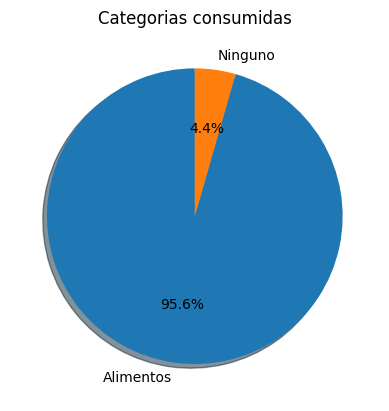

In [46]:
conteoCategoria = dliveryAlimentos['¿qué_categorías_consumes_dentro_de_la_universidad?'].value_counts()
plt.pie(conteoCategoria, labels=conteoCategoria.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Categorias consumidas')

In [47]:
#TABLA DE FRECUENCIA CUANTO PAGARIAS A UN REPARTIDOR
conteoCategoriaRF = conteoCategoria / dliveryAlimentos['¿qué_categorías_consumes_dentro_de_la_universidad?'].count()

# Create a complete frequency table
conteoCategoriaFT = pd.DataFrame({

    'Categoria consumida en la Uni': conteoCategoria.index,

    'Frecuencia': conteoCategoria.values,

    'Frecuencia Relativa': conteoCategoriaRF.values,

    'Porcentaje': (conteoCategoriaRF * 100).values

})

conteoCategoriaFT

,Categoria consumida en la Uni,Frecuencia,Frecuencia Relativa,Porcentaje
0,Alimentos,43,0.955556,95.555556
1,Ninguno,2,0.044444,4.444444


### CONSUMIDORES ALIMENTOS

Text(0.5, 1.0, 'Consumes Alimentos dentro de la Universidad')

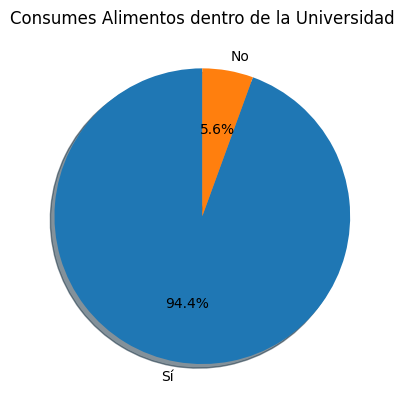

In [48]:
#GRAFICA CONSUMES ALIMENTOS EN LA UNIVERSIDAD
conteoAlimentos = dliveryAlimentos['¿consumes_alimentos_dentro_de_la_universidad?_'].value_counts()
plt.pie(conteoAlimentos, labels=conteoAlimentos.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Consumes Alimentos dentro de la Universidad')

In [49]:
#TABLA DE FRECUENCIA CUANTO PAGARIAS A UN REPARTIDOR
conteoAlimentosRF = conteoAlimentos / dliveryAlimentos['¿consumes_alimentos_dentro_de_la_universidad?_'].count()

# Create a complete frequency table
conteoAlimentosFT = pd.DataFrame({

    'Consumes Alimentos dentro de la uni': conteoAlimentos.index,

    'Frecuencia': conteoAlimentos.values,

    'Frecuencia Relativa': conteoAlimentosRF.values,

    'Porcentaje': (conteoAlimentosRF * 100).values

})

conteoAlimentosFT

,Consumes Alimentos dentro de la uni,Frecuencia,Frecuencia Relativa,Porcentaje
0,Sí,34,0.944444,94.444444
1,No,2,0.055556,5.555556


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuantas veces compras alimentos en la universidad a la semana')

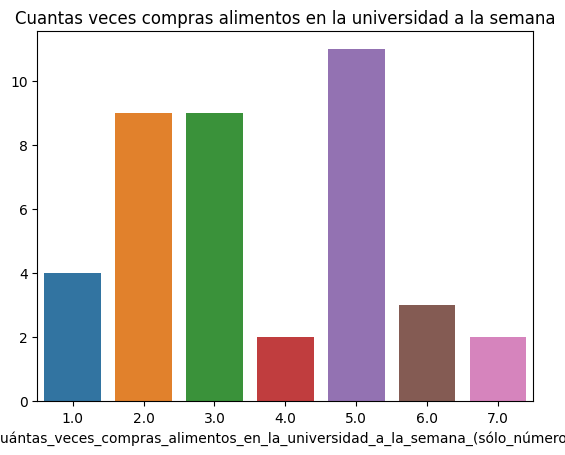

In [50]:
#GRAFICA CUANATS VECES COMPRAS ALIMENTOS DENTRO DE LA UNIVERSIDAD
cuantasCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].value_counts()
#Grafica de barras
sns.barplot(x=cuantasCAlimentos.index, y=cuantasCAlimentos.values)
plt.title('Cuantas veces compras alimentos en la universidad a la semana')

In [51]:
#TABLA DE FRECUENCIA CUANTO PAGARIAS A UN REPARTIDOR
cuantasCAlimentosRF = cuantasCAlimentos / dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].count()

# Create a complete frequency table
cuantasCAlimentosFT = pd.DataFrame({

    'Cuantas veces compras alimentos?': cuantasCAlimentos.index,

    'Frecuencia': cuantasCAlimentos.values,

    'Frecuencia Relativa': cuantasCAlimentosRF.values,

    'Porcentaje': (cuantasCAlimentosRF * 100).values

})

cuantasCAlimentosFT

,Cuantas veces compras alimentos?,Frecuencia,Frecuencia Relativa,Porcentaje
0,5.0,11,0.275,27.5
1,2.0,9,0.225,22.5
2,3.0,9,0.225,22.5
3,1.0,4,0.100,10.0
4,6.0,3,0.075,7.5
5,7.0,2,0.050,5.0
6,4.0,2,0.050,5.0


In [52]:
#Mediana
medianaCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].median(skipna=True).round()

#Media
meanCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].mean(skipna=True).round()

#Rango
rangoCAlimentos = pd.Series(cuantasCAlimentos).index.max() - pd.Series(cuantasCAlimentos).index.min()

#Desviacion estandar
desviacionEstandarCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].std(skipna=True).round()

#varianza
varianzaCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].var(skipna=True)

#Moda
modaCAlimentos = dliveryAlimentos['¿cuántas_veces_compras_alimentos_en_la_universidad_a_la_semana_(sólo_números)?'].mode().iloc[0]

print('Media cuantas veces compras alimentos: ' + str(meanCAlimentos))
print('Rango cuantas veces compras alimentos: ' + str(rangoCAlimentos))
print('Desviacion estandar cuantas veces compras alimentos: ' + str(desviacionEstandarCAlimentos))
print('Mediana cuantas veces compras alimentos: ' + str(medianaCAlimentos))
print('Varianza cuantas veces compras alimentos: ' + str(varianzaCAlimentos))
print('Moda cuantas veces compras alimentos: ' + str(modaCAlimentos))
print('Coeficiente de variacion cuantas veces compras alimentos: ' + str((desviacionEstandarCAlimentos/meanCAlimentos)*100))

Media cuantas veces compras alimentos: 4.0
Rango cuantas veces compras alimentos: 6.0
Desviacion estandar cuantas veces compras alimentos: 2.0
Mediana cuantas veces compras alimentos: 3.0
Varianza cuantas veces compras alimentos: 2.964102564102564
Moda cuantas veces compras alimentos: 5.0
Coeficiente de variacion cuantas veces compras alimentos: 50.0


+ En promedio, las personas compran alimentos 4 veces, pero la mediana de 3 sugiere que muchas personas compran menos que el promedio, mientras que algunas compran mucho más, elevando la media.
+ La desviación estándar de 2 muestra una variabilidad moderada, indicando que hay una dispersión, pero no extrema, en las respuestas.
+ La moda de 5 refleja que la cantidad más común de veces que las personas compran alimentos es 5, lo que indica que hay un grupo significativo que prefiere comprar con esta frecuencia.
+ El rango de 6 sugiere que hay cierta diversidad en los hábitos de compra, con algunas personas que compran mucho menos o mucho más frecuentemente.

Text(0.5, 1.0, 'Calidad de Alimentos dentro de la Universidad')

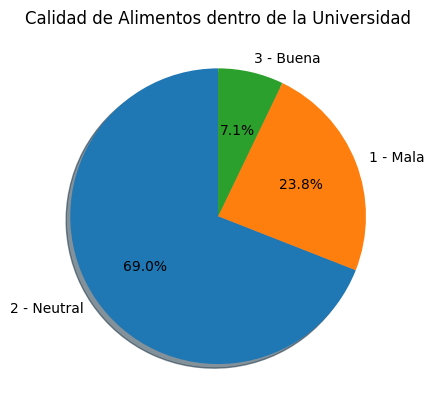

In [53]:
#GRAFICA CALIDAD DE ALIMENTOS EN LA UNIVERSDIAD
calidadAlimentos = dliveryAlimentos['¿cómo_calificarías_la_calidad_de_alimentos_dentro_de_la_universidad?'].value_counts()
plt.pie(calidadAlimentos, labels=calidadAlimentos.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Calidad de Alimentos dentro de la Universidad')

In [54]:
#TABLA DE FRECUENCIA CALIDAD DE ALIMENTOS EN LA UNIVERSIDAD
calidadAlimentosRF = calidadAlimentos / dliveryAlimentos['¿cómo_calificarías_la_calidad_de_alimentos_dentro_de_la_universidad?'].count()

# Create a complete frequency table
calidadAlimentosFT = pd.DataFrame({

    'Calidad de alimento en la universidad': calidadAlimentos.index,

    'Frecuencia': calidadAlimentos.values,

    'Frecuencia Relativa': calidadAlimentosRF.values,

    'Porcentaje': (calidadAlimentosRF * 100).values

})

calidadAlimentosFT

,Calidad de alimento en la universidad,Frecuencia,Frecuencia Relativa,Porcentaje
0,2 - Neutral,29,0.690476,69.047619
1,1 - Mala,10,0.238095,23.809524
2,3 - Buena,3,0.071429,7.142857


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuanto gastas de Alimentos dentro de la Universidad')

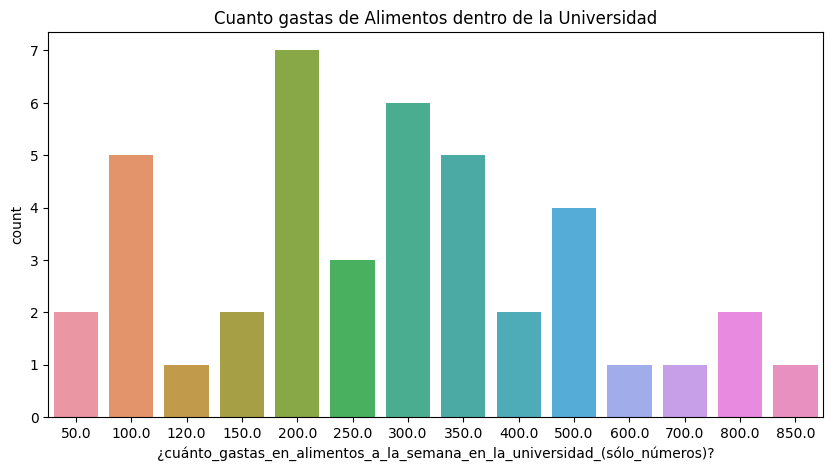

In [55]:
#GRAFICA CUANTO GASTAS EN ALIMETOS DE LA UNIVERSIDAD
gastasAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=gastasAlimentos, x=gastasAlimentos.index)
plt.title('Cuanto gastas de Alimentos dentro de la Universidad')

In [56]:
#TABLA DE CUANTO GASTAN EN ALIMENTOS DE LA UNIVERSIDAD
gastasAlimentosRF = gastasAlimentos / dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].count()

# Create a complete frequency table
gastasAlimentosFT = pd.DataFrame({

    'Cuanto gastan en alimento en la universidad': gastasAlimentos.index,

    'Frecuencia': gastasAlimentos.values,

    'Frecuencia Relativa': gastasAlimentosRF.values,

    'Porcentaje': (gastasAlimentosRF * 100).values

})

gastasAlimentosFT

,Cuanto gastan en alimento en la universidad,Frecuencia,Frecuencia Relativa,Porcentaje
0,200.0,7,0.166667,16.666667
1,300.0,6,0.142857,14.285714
2,350.0,5,0.119048,11.904762
3,100.0,5,0.119048,11.904762
4,500.0,4,0.095238,9.523810
5,250.0,3,0.071429,7.142857
6,50.0,2,0.047619,4.761905
7,800.0,2,0.047619,4.761905
8,400.0,2,0.047619,4.761905
9,150.0,2,0.047619,4.761905


In [57]:
#Mediana
medianaGAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].median(skipna=True).round()

#Media
meanGAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].mean(skipna=True).round()

#Rango
rangoGAlimentos = pd.Series(gastasAlimentos).index.max() - pd.Series(gastasAlimentos).index.min()

#Desviacion estandar
desviacionEstandarGAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].std(skipna=True).round()

#varianza
varianzaGAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].var(skipna=True)

#Moda
modaGAlimentos = dliveryAlimentos['¿cuánto_gastas_en_alimentos_a_la_semana_en_la_universidad_(sólo_números)?'].mode().iloc[0]

print('Media cuanto gastas en alimentos: ' + str(meanGAlimentos))
print('Rango cuanto gastas en alimentos: ' + str(rangoGAlimentos))
print('Desviacion estandar cuanto gastas en alimentos: ' + str(desviacionEstandarGAlimentos))
print('Mediana cuanto gastas en alimentos: ' + str(medianaGAlimentos))
print('Varianza cuanto gastas en alimentos: ' + str(varianzaGAlimentos))
print('Moda cuanto gastas en alimentos: ' + str(modaGAlimentos))
print('Coeficiente de variacion cuanto gastas en alimentos: ' + str((desviacionEstandarGAlimentos/meanGAlimentos)*100))

Media cuanto gastas en alimentos: 316.0
Rango cuanto gastas en alimentos: 800.0
Desviacion estandar cuanto gastas en alimentos: 204.0
Mediana cuanto gastas en alimentos: 300.0
Varianza cuanto gastas en alimentos: 41810.04645760744
Moda cuanto gastas en alimentos: 200.0
Coeficiente de variacion cuanto gastas en alimentos: 64.55696202531645


+ Aunque la media de gasto es 316 unidades monetarias, la mediana de 300 y la moda de 200 sugieren que muchas personas tienden a gastar menos que el promedio.
+ La alta desviación estándar (204) y el rango (800) indican que las cantidades gastadas varían mucho, lo que significa que algunas personas gastan significativamente más o menos que otras.
+ La varianza alta confirma la diversidad en los patrones de gasto, lo que podría deberse a diferentes necesidades, hábitos de compra o presupuestos.
+ El hecho de que la moda sea 200 sugiere que, a pesar de la variabilidad general, hay una preferencia común por gastar una cantidad más baja.

Text(0.5, 1.0, 'Satisfacción de los alimentos dentro del campus')

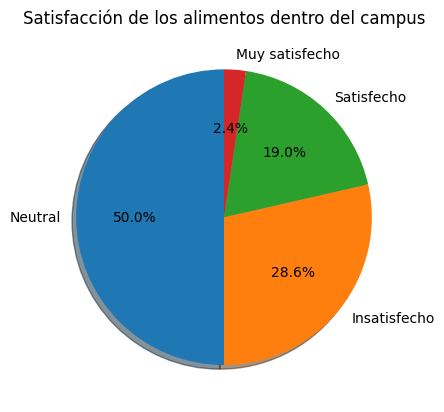

In [58]:
#GRAFICA SATISFACION DE LOS ALIMENTOS DENTRO DEL CMAPUS
satisfaccionAlimentos = dliveryAlimentos['¿qué_tan_satisfecho_estás_con_la_oferta_de_alimentos_dentro_del_campus?'].value_counts()
plt.pie(satisfaccionAlimentos, labels=satisfaccionAlimentos.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Satisfacción de los alimentos dentro del campus')

In [59]:
#TABLA DE CUANTO GASTAN EN ALIMENTOS DE LA UNIVERSIDAD
satisfaccionAlimentosRF = satisfaccionAlimentos / dliveryAlimentos['¿qué_tan_satisfecho_estás_con_la_oferta_de_alimentos_dentro_del_campus?'].count()

# Create a complete frequency table
satisfaccionAlimentosFT = pd.DataFrame({

    'Satisfaccion con la oferta de alimentos en el campus': satisfaccionAlimentos.index,

    'Frecuencia': satisfaccionAlimentos.values,

    'Frecuencia Relativa': satisfaccionAlimentosRF.values,

    'Porcentaje': (satisfaccionAlimentosRF * 100).values

})

satisfaccionAlimentosFT

,Satisfaccion con la oferta de alimentos en el campus,Frecuencia,Frecuencia Relativa,Porcentaje
0,Neutral,21,0.500000,50.000000
1,Insatisfecho,12,0.285714,28.571429
2,Satisfecho,8,0.190476,19.047619
3,Muy satisfecho,1,0.023810,2.380952


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuantas veces usarías una app para comprar alimentos en la universidad')

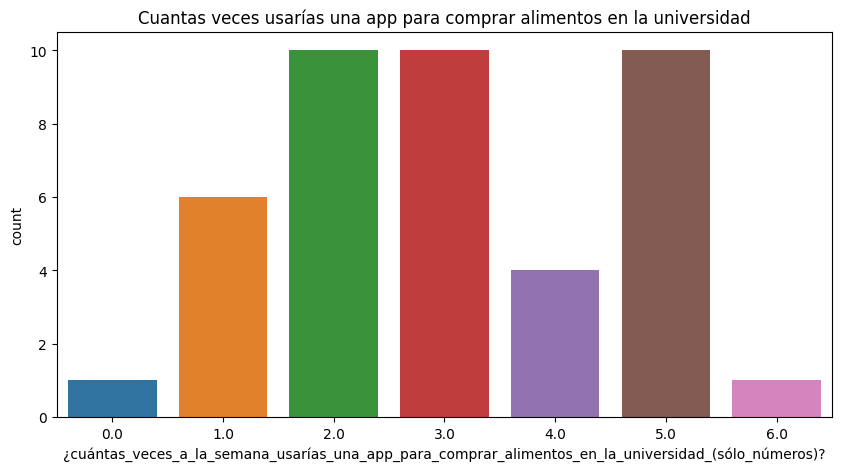

In [60]:
#GRAFICA CUANTAS VECES USARIAS UNA APP PARA COMPRAR ALIMENTOS
usariasAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=usariasAlimentos, x=usariasAlimentos.index)
plt.title('Cuantas veces usarías una app para comprar alimentos en la universidad')

In [61]:
#TABLA DE CUANTO GASTAN EN ALIMENTOS DE LA UNIVERSIDAD
usariasAlimentosRF = usariasAlimentos / dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].count()

# Create a complete frequency table
usariasAlimentosFT = pd.DataFrame({

    'Cuantas veces usarias una app para comprar alimento': usariasAlimentos.index,

    'Frecuencia': usariasAlimentos.values,

    'Frecuencia Relativa': usariasAlimentosRF.values,

    'Porcentaje': (usariasAlimentosRF * 100).values

})

usariasAlimentosFT

,Cuantas veces usarias una app para comprar alimento,Frecuencia,Frecuencia Relativa,Porcentaje
0,5.0,10,0.238095,23.809524
1,3.0,10,0.238095,23.809524
2,2.0,10,0.238095,23.809524
3,1.0,6,0.142857,14.285714
4,4.0,4,0.095238,9.523810
5,0.0,1,0.023810,2.380952
6,6.0,1,0.023810,2.380952


In [62]:
#Mediana
medianaSAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].median(skipna=True).round()

#Media
meanSAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].mean(skipna=True).round()

#Rango
rangoSAlimentos = pd.Series(usariasAlimentos).index.max() - pd.Series(usariasAlimentos).index.min()

#Desviacion estandar
desviacionEstandarSAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].std(skipna=True).round()

#varianza
varianzaSAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].var(skipna=True)

#Moda
modaSAlimentos = dliveryAlimentos['¿cuántas_veces_a_la_semana_usarías_una_app_para_comprar_alimentos_en_la_universidad_(sólo_números)?'].mode().iloc[0]

print('Media cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(meanSAlimentos))
print('Rango cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(rangoSAlimentos))
print('Desviacion estandar cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(desviacionEstandarSAlimentos))
print('Mediana cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(medianaSAlimentos))
print('Varianza cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(varianzaSAlimentos))
print('Moda cuantas veces usarias una app para comprar Alimento en la Uni: ' + str(modaSAlimentos))
print('Coeficiente de variacion cuantas veces usarias una app para comprar Alimento en la Uni: ' + str((desviacionEstandarSAlimentos/meanSAlimentos)*100))

Media cuantas veces usarias una app para comprar Alimento en la Uni: 3.0
Rango cuantas veces usarias una app para comprar Alimento en la Uni: 6.0
Desviacion estandar cuantas veces usarias una app para comprar Alimento en la Uni: 2.0
Mediana cuantas veces usarias una app para comprar Alimento en la Uni: 3.0
Varianza cuantas veces usarias una app para comprar Alimento en la Uni: 2.339140534262486
Moda cuantas veces usarias una app para comprar Alimento en la Uni: 2.0
Coeficiente de variacion cuantas veces usarias una app para comprar Alimento en la Uni: 66.66666666666666


+ En promedio, las personas usarían la app para comprar alimentos 3 veces, pero la moda de 2 sugiere que la opción más común es usarla menos veces.
+ La mediana igual a la media (3) indica que las respuestas están relativamente equilibradas alrededor del promedio, sin una gran concentración de respuestas muy altas o muy bajas que distorsionen el promedio.
+ La desviación estándar de 2 y la varianza de 2.34 muestran una dispersión moderada, lo que indica que, aunque hay diversidad en las respuestas, la mayoría de las personas tienen preferencias similares en cuanto a la frecuencia de uso de la app.
+ El rango de 6 refleja que hay personas que usarían la app con mucha más o mucha menos frecuencia, mostrando cierta diversidad en los hábitos.

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuantas veces usarías una app para comprar alimentos en la universidad')

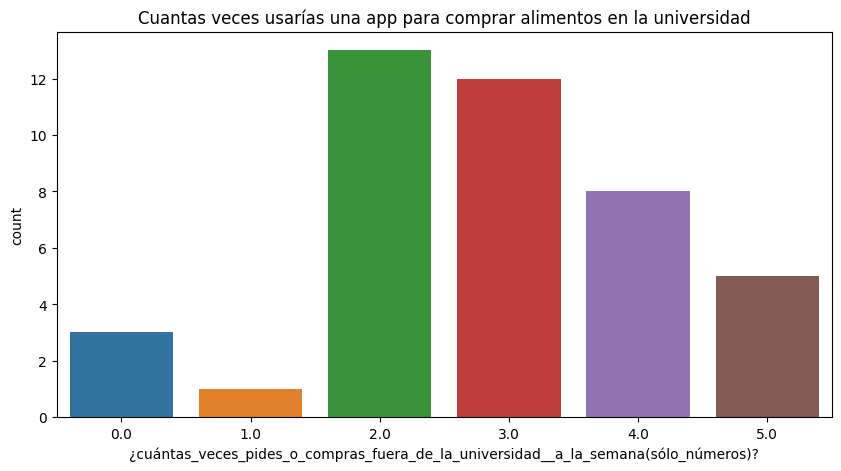

In [63]:
#GRAFICA CUANTAS VECES USARIAS UNA APP PARA COMPRAR ALIMENTOS
fueraAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=fueraAlimentos, x=fueraAlimentos.index)
plt.title('Cuantas veces usarías una app para comprar alimentos en la universidad')

In [64]:
#TABLA DE COMPRAR ALIMENTOS FUERA DE LA UNIVERSIDAD
fueraAlimentosRF = fueraAlimentos / dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].count()

# Create a complete frequency table
fueraAlimentosFT = pd.DataFrame({

    'Cuantas veces compras alimento fuera de la Uni': fueraAlimentos.index,

    'Frecuencia': fueraAlimentos.values,

    'Frecuencia Relativa': fueraAlimentosRF.values,

    'Porcentaje': (fueraAlimentosRF * 100).values

})

fueraAlimentosFT

,Cuantas veces compras alimento fuera de la Uni,Frecuencia,Frecuencia Relativa,Porcentaje
0,2.0,13,0.309524,30.952381
1,3.0,12,0.285714,28.571429
2,4.0,8,0.190476,19.047619
3,5.0,5,0.119048,11.904762
4,0.0,3,0.071429,7.142857
5,1.0,1,0.023810,2.380952


In [65]:
#Mediana
medianaFAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].median(skipna=True).round()

#Media
meanFAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].mean(skipna=True).round()

#Rango
rangoFAlimentos = pd.Series(fueraAlimentos).index.max() - pd.Series(fueraAlimentos).index.min()

#Desviacion estandar
desviacionEstandarFAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].std(skipna=True).round()

#varianza
varianzaFAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].var(skipna=True)

#Moda
modaFAlimentos = dliveryAlimentos['¿cuántas_veces_pides_o_compras_fuera_de_la_universidad__a_la_semana(sólo_números)?'].mode().iloc[0]

print('Media cuantas veces compras Alimento fuera de la Uni: ' + str(meanFAlimentos))
print('Rango cuantas veces compras Alimento fuera de la Uni: ' + str(rangoFAlimentos))
print('Desviacion estandar cuantas veces compras Alimento fuera de la Uni: ' + str(desviacionEstandarFAlimentos))
print('Mediana cuantas veces compras Alimento fuera de la Uni: ' + str(medianaFAlimentos))
print('Varianza cuantas veces compras Alimento fuera de la Uni: ' + str(varianzaFAlimentos))
print('Moda cuantas veces compras Alimento fuera de la Uni: ' + str(modaFAlimentos))
print('Coeficiente de variacion cuantas veces compras Alimento fuera de la Uni: ' + str((desviacionEstandarFAlimentos/meanFAlimentos)*100))

Media cuantas veces compras Alimento fuera de la Uni: 3.0
Rango cuantas veces compras Alimento fuera de la Uni: 5.0
Desviacion estandar cuantas veces compras Alimento fuera de la Uni: 1.0
Mediana cuantas veces compras Alimento fuera de la Uni: 3.0
Varianza cuantas veces compras Alimento fuera de la Uni: 1.735191637630662
Moda cuantas veces compras Alimento fuera de la Uni: 2.0
Coeficiente de variacion cuantas veces compras Alimento fuera de la Uni: 33.33333333333333


+ En promedio, las personas compran alimentos fuera de la universidad 3 veces, pero la moda de 2 indica que la opción más común es comprar con menor frecuencia.
+ La mediana igual a la media (3) muestra que las respuestas están equilibradas, sin sesgos extremos, lo que sugiere una distribución bastante uniforme.
+ La desviación estándar baja (1.0) y la varianza de 1.74 indican que la mayoría de las respuestas están cercanas al promedio y hay poca dispersión, lo que significa que las personas tienden a tener hábitos de compra similares.
+ El rango de 5 refleja que hay una pequeña diversidad en las frecuencias de compra, pero no es muy pronunciada.

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Que medio utilizas para enterarte de nuevos alimentos')

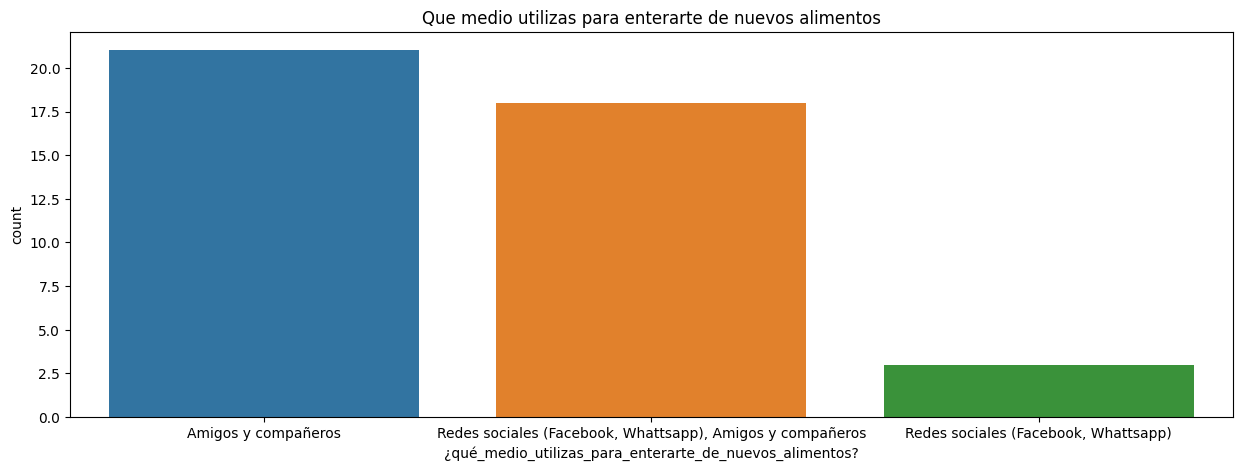

In [66]:
#GRAFICA QUE MEDIOS UTILIZAS PARA ENTERARTE DE NUEVOS ALIMENTOS
enterarAlimentos = dliveryAlimentos['¿qué_medio_utilizas_para_enterarte_de_nuevos_alimentos?'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(y=enterarAlimentos, x=enterarAlimentos.index)
plt.title('Que medio utilizas para enterarte de nuevos alimentos')

In [67]:
#TABLA DE COMPRAR ALIMENTOS FUERA DE LA UNIVERSIDAD
enterarAlimentosRF = enterarAlimentos / dliveryAlimentos['¿qué_medio_utilizas_para_enterarte_de_nuevos_alimentos?'].count()

# Create a complete frequency table
enterarAlimentosFT = pd.DataFrame({

    'Que medio utlizas para enterarte de nuevos alimentos': enterarAlimentos.index,

    'Frecuencia': enterarAlimentos.values,

    'Frecuencia Relativa': enterarAlimentosRF.values,

    'Porcentaje': (enterarAlimentosRF * 100).values

})

enterarAlimentosFT

,Que medio utlizas para enterarte de nuevos alimentos,Frecuencia,Frecuencia Relativa,Porcentaje
0,Amigos y compañeros,21,0.500000,50.000000
1,"Redes sociales (Facebook, Whattsapp), Amigos y...",18,0.428571,42.857143
2,"Redes sociales (Facebook, Whattsapp)",3,0.071429,7.142857


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Cuanto pagarías por envios de tus productos')

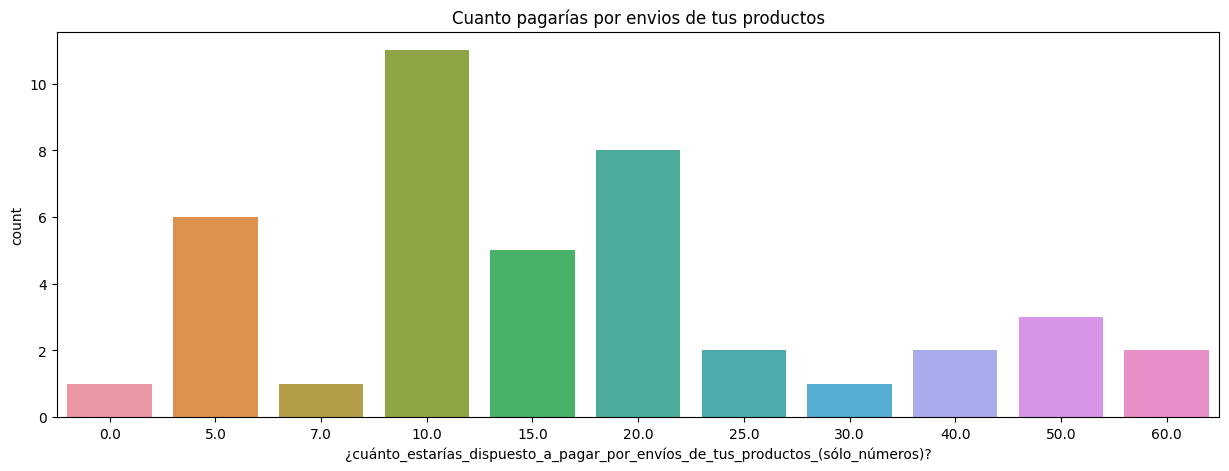

In [68]:
#GRAFICA CUANTO PAGARIAS POR EL ENVIO DE TUS PRODUCTOS
enviosAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(y=enviosAlimentos, x=enviosAlimentos.index)
plt.title('Cuanto pagarías por envios de tus productos')

In [69]:
#TABLA DE COMPRAR ALIMENTOS FUERA DE LA UNIVERSIDAD
enviosAlimentosRF = enviosAlimentos / dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].count()

# Create a complete frequency table
enviosAlimentosFT = pd.DataFrame({

    'Cuanto pagarias de por envio de tus productos': enviosAlimentos.index,

    'Frecuencia': enviosAlimentos.values,

    'Frecuencia Relativa': enviosAlimentosRF.values,

    'Porcentaje': (enviosAlimentosRF * 100).values

})

enviosAlimentosFT

,Cuanto pagarias de por envio de tus productos,Frecuencia,Frecuencia Relativa,Porcentaje
0,10.0,11,0.261905,26.190476
1,20.0,8,0.190476,19.047619
2,5.0,6,0.142857,14.285714
3,15.0,5,0.119048,11.904762
4,50.0,3,0.071429,7.142857
5,60.0,2,0.047619,4.761905
6,40.0,2,0.047619,4.761905
7,25.0,2,0.047619,4.761905
8,30.0,1,0.023810,2.380952
9,7.0,1,0.023810,2.380952


In [70]:
#Mediana
medianaPAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].median(skipna=True).round()

#Media
meanPAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].mean(skipna=True).round()

#Rango
rangoPAlimentos = pd.Series(enviosAlimentos).index.max() - pd.Series(enviosAlimentos).index.min()

#Desviacion estandar
desviacionEstandarPAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].std(skipna=True).round()

#varianza
varianzaPAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].var(skipna=True)

#Moda
modaPAlimentos = dliveryAlimentos['¿cuánto_estarías_dispuesto_a_pagar_por_envíos_de_tus_productos_(sólo_números)?'].mode().iloc[0]

print('Media Cuanto pagarias por el envio de tus Alimentos: ' + str(meanPAlimentos))
print('Rango Cuanto pagarias por el envio de tus Alimentos: ' + str(rangoPAlimentos))
print('Desviacion estandar Cuanto pagarias por el envio de tus Alimentos: ' + str(desviacionEstandarPAlimentos))
print('Mediana Cuanto pagarias por el envio de tus Alimentos: ' + str(medianaPAlimentos))
print('Varianza Cuanto pagarias por el envio de tus Alimentos: ' + str(varianzaPAlimentos))
print('Moda Cuanto pagarias por el envio de tus Alimentos: ' + str(modaPAlimentos))
print('Coeficiente de variacion Cuanto pagarias por el envio de tus Alimentos: ' + str((desviacionEstandarPAlimentos/meanPAlimentos)*100))

Media Cuanto pagarias por el envio de tus Alimentos: 19.0
Rango Cuanto pagarias por el envio de tus Alimentos: 60.0
Desviacion estandar Cuanto pagarias por el envio de tus Alimentos: 16.0
Mediana Cuanto pagarias por el envio de tus Alimentos: 15.0
Varianza Cuanto pagarias por el envio de tus Alimentos: 243.3008130081301
Moda Cuanto pagarias por el envio de tus Alimentos: 10.0
Coeficiente de variacion Cuanto pagarias por el envio de tus Alimentos: 84.21052631578947


+ En promedio, las personas pagarían 19 unidades monetarias por el envío, pero la mediana de 15 y la moda de 10 sugieren que muchas personas prefieren pagar menos que ese promedio.
+ La desviación estándar alta (16) y el rango (60) indican que hay una gran variedad de opiniones, con algunas personas dispuestas a pagar significativamente más que otras.
+ La varianza alta también refleja esta dispersión, sugiriendo que las expectativas de costos de envío varían mucho.
+ La moda de 10 muestra que, a pesar del promedio más alto, muchas personas prefieren un costo de envío más bajo, lo que podría ser un punto importante para considerar si se fija un precio competitivo para el envío.

Text(0.5, 1.0, 'Estas dispuesto a utilizar una aplicación que te organice todos los vendedores de alimentos dentro de la universidad?')

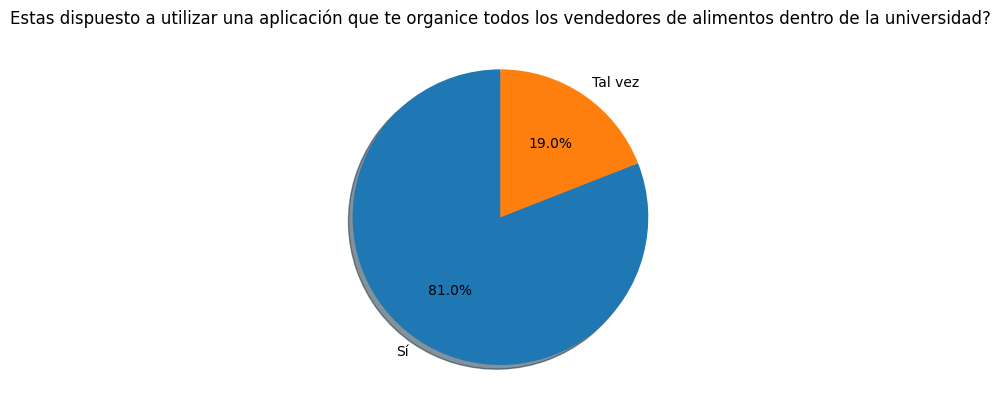

In [71]:
#GRAFICA SATISFACION DE LOS ALIMENTOS DENTRO DEL CMAPUS
dispuestoAlimentos = dliveryAlimentos['¿estás_dispuesto_a_utilizar_una_aplicación_que_te_organice_todos_los_vendedores_de_alimentos_dentro_de_la_universidad?'].value_counts()
plt.pie(dispuestoAlimentos, labels=dispuestoAlimentos.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Estas dispuesto a utilizar una aplicación que te organice todos los vendedores de alimentos dentro de la universidad?')

In [72]:
#TABLA DE COMPRAR ALIMENTOS FUERA DE LA UNIVERSIDAD
dispuestoAlimentosRF = dispuestoAlimentos / dliveryAlimentos['¿estás_dispuesto_a_utilizar_una_aplicación_que_te_organice_todos_los_vendedores_de_alimentos_dentro_de_la_universidad?'].count()

# Create a complete frequency table
dispuestoAlimentosFT = pd.DataFrame({

    'Estas dispuesto a utilizar una app que organice a los vendedores de la Uni': dispuestoAlimentos.index,

    'Frecuencia': dispuestoAlimentos.values,

    'Frecuencia Relativa': dispuestoAlimentosRF.values,

    'Porcentaje': (dispuestoAlimentosRF * 100).values

})

dispuestoAlimentosFT

,Estas dispuesto a utilizar una app que organice a los vendedores de la Uni,Frecuencia,Frecuencia Relativa,Porcentaje
0,Sí,34,0.809524,80.952381
1,Tal vez,8,0.190476,19.047619


### Sacar insights

In [73]:


# Filtrar el DataFrame para obtener solo las filas donde el tipo sea 'Alimentos'
alimentos_df = dlivery_df[dlivery_df['¿qué_tipo_de_productos_vendes_dentro_de_la_universidad?'] == 'Alimentos']

# Calcular el máximo de la columna de ventas
max_ventas = alimentos_df['¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?'].mean()

print(f"El promedio de ventas para 'Alimentos' es: {max_ventas}")

# Filtrar el DataFrame para obtener solo las filas donde el tipo sea 'Alimentos'
tec_df = dlivery_df[dlivery_df['¿qué_tipo_de_productos_vendes_dentro_de_la_universidad?'] == 'Tecnología']

# Calcular el máximo de la columna de ventas
max_ventasT = tec_df['¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?'].mean()

print(f"El promedio de ventas para 'Tecnologia' es: {max_ventasT}")

El promedio de ventas para 'Alimentos' es: 30.428571428571427
El promedio de ventas para 'Tecnologia' es: 1.0


Text(0.5, 1.0, 'Ventas por dia (Alimentos)')

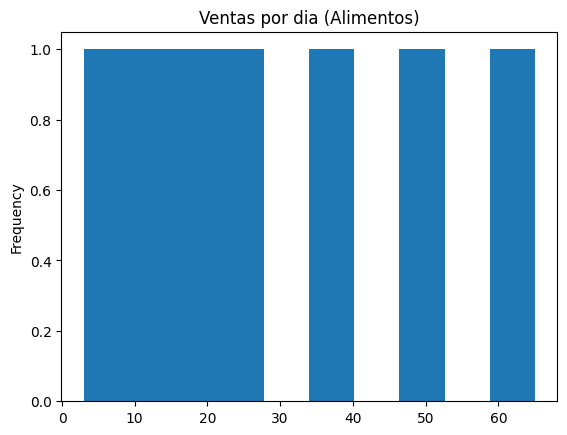

In [74]:
alimentos_df['¿cuántas_ventas_realizas_al_día_dentro_de_la_universidad_(sólo_números)?'].plot(kind='hist')
plt.title('Ventas por dia (Alimentos)')